# Assignment 3: Clustering - Group 4

|  <font size=4>Name</font>  | <font size=4>Working Hours</font>   |
|  :----  | :----  |
| <font size=4>Dimitrios Koutsakis</font>   | <font size=4>8</font> |
| <font size=4>Bingcheng Chen</font>  | <font size=4>8</font> |

## Question 1

**Import Libraries**

In [389]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

%matplotlib inline

**Load dataset**

In [390]:
df = pd.read_csv('data_assignment3.csv')

df.head()

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520


**Plot the dataset**

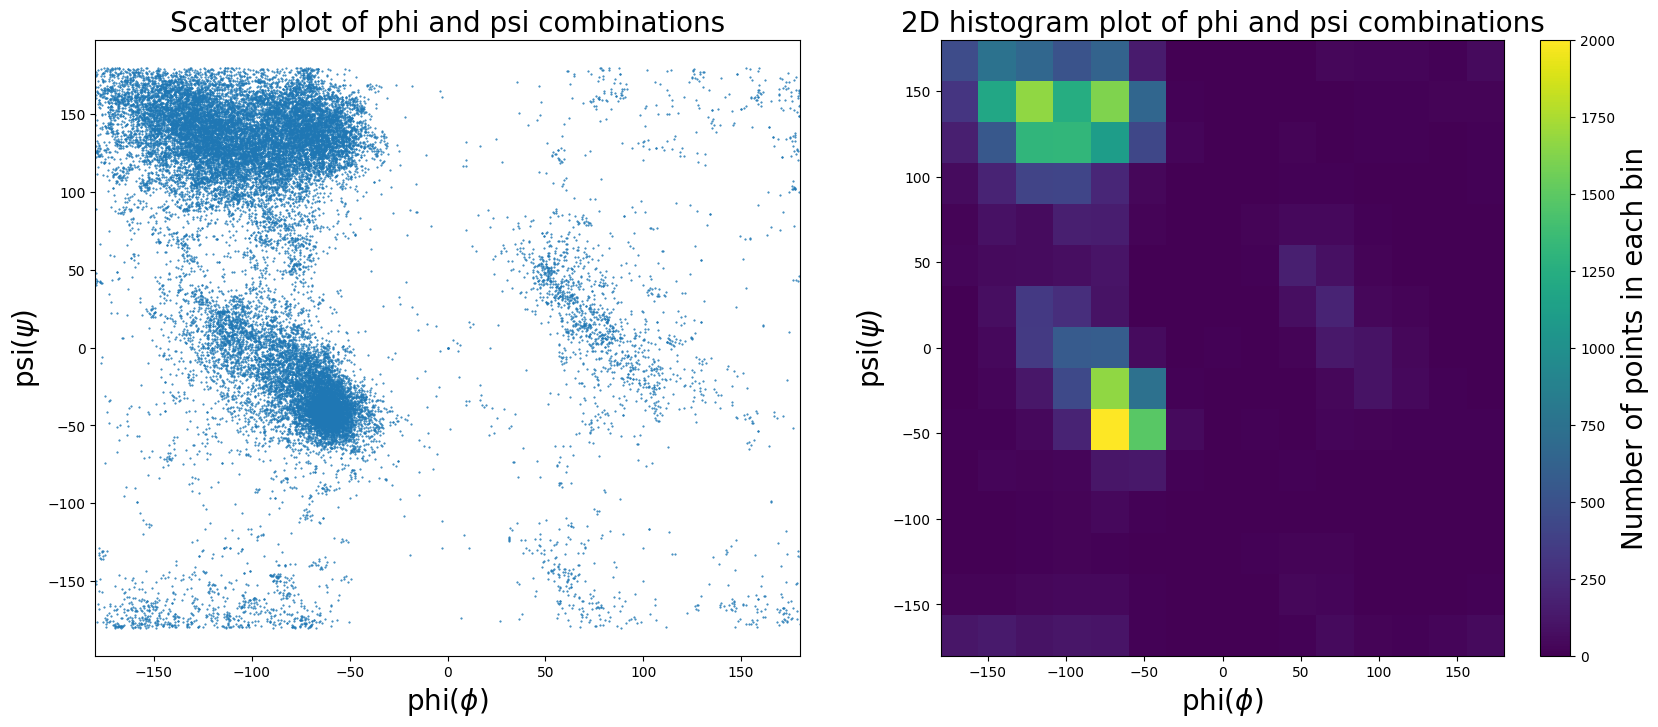

In [391]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

ax[0].scatter(df['phi'], df['psi'], marker='.', s=1)
ax[0].set_xlabel('phi($\phi$)',fontsize=20)
ax[0].set_ylabel('psi($\psi$)',fontsize=20)
ax[0].set_xlim(-180,180)
ax[0].set_xlim(-180,180)
ax[0].set_title('Scatter plot of phi and psi combinations', fontsize=20)

h = ax[1].hist2d(df['phi'], df['psi'], bins=15,cmap='viridis')
ax[1].set_xlabel('phi($\phi$)',fontsize=20)
ax[1].set_ylabel('psi($\psi$)',fontsize=20)
ax[1].set_xlim(-180,180)
ax[1].set_xlim(-180,180)
ax[1].set_title('2D histogram plot of phi and psi combinations', fontsize=20)

cbar = fig.colorbar(h[3], ax=ax[1])
cbar.set_label('Number of points in each bin',fontsize=20)

**Transform the data**

Since the edges of the Ramachandran plot wrap around which means that phi and psi angles close to the edge of the plot may actually be close to angles on the opposite side of the plot. To address this issue, we separate phi and psi into two variables, respectively, by exploiting the symmetry of the sine and cosine functions.

In [392]:
# Convert phi and psi data into circular variables (in radians)
phi= np.deg2rad(df['phi'])
psi = np.deg2rad(df['psi'])
r = np.sqrt(phi**2 + psi**2)

df['x_phi'] = r*np.cos(phi)
df['y_phi'] = r*np.sin(phi)
df['x_psi'] = r*np.cos(psi)
df['y_psi'] = r*np.sin(psi)

df

,residue name,position,chain,phi,psi,x_phi,y_phi,x_psi,y_psi
0,LYS,10,A,-149.312855,142.657714,-3.099531,-1.839426,-2.865468,2.186246
1,PRO,11,A,-44.283210,136.002076,1.787126,-1.742961,-1.795782,1.734041
2,LYS,12,A,-119.972621,-168.705263,-1.805045,-3.129882,-3.543104,-0.707644
3,LEU,13,A,-135.317212,137.143523,-2.390849,-2.364521,-2.464992,2.287125
4,LEU,14,A,-104.851467,95.928520,-0.635746,-2.397481,-0.256189,2.467074
...,...,...,...,...,...,...,...,...,...
29364,GLY,374,B,-147.749557,155.223562,-3.163203,-1.995867,-3.395943,1.567452
29365,GLN,375,B,-117.428541,133.019506,-1.426538,-2.748719,-2.112816,2.264172
29366,ILE,376,B,-113.586448,112.091970,-1.114463,-2.552550,-1.047511,2.580747
29367,ASN,377,B,-100.668779,-12.102821,-0.327618,-1.739063,1.730320,-0.371037


## Question 2
**Use the K-means clustering method to cluster the phi and psi angle combinations in the data file.**

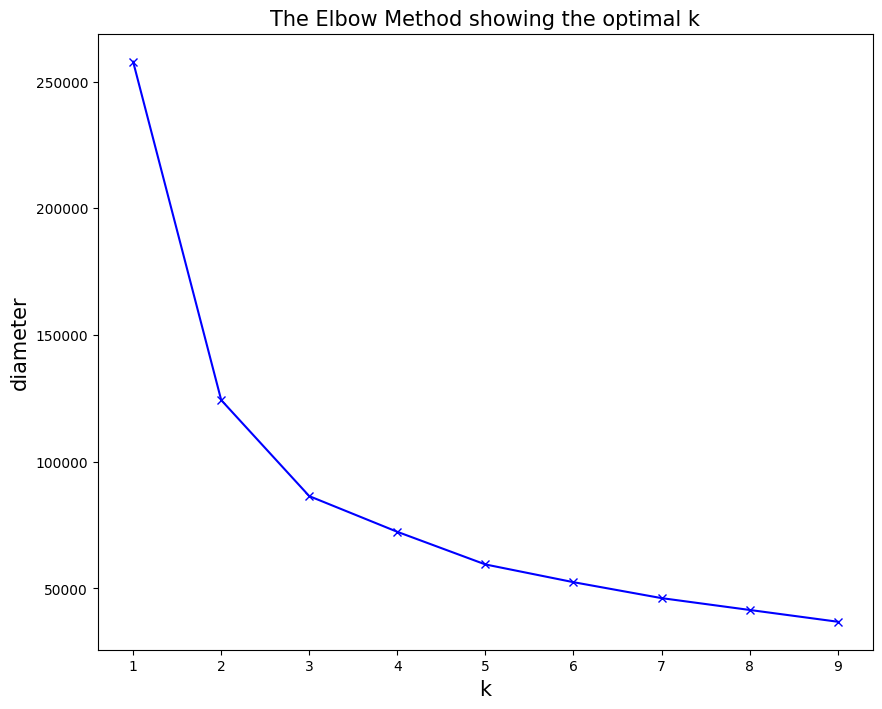

In [393]:
diameter = []
K = range(1,10)
for k in K:
    # kmeanModel = KMeans(n_clusters=k)
    kmeanModel = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeanModel.fit(df[['x_phi','y_phi','x_psi','y_psi']])
    diameter.append(kmeanModel.inertia_)

plt.figure(figsize=(10,8))
plt.plot(K, diameter, 'bx-')
plt.xlabel('k',fontsize=15)
plt.ylabel('diameter',fontsize=15)
plt.title('The Elbow Method showing the optimal k',fontsize=15)
plt.show()

**Choose k = 3**

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K_Means (k=3)')

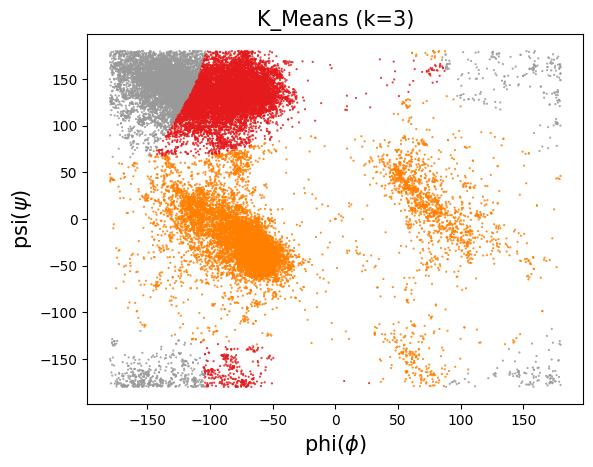

In [394]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df[['x_phi','y_phi','x_psi','y_psi']])

df['k_means']=kmeanModel.predict(df[['x_phi','y_phi','x_psi','y_psi']])

plt.scatter(df['phi'], df['psi'], c=df['k_means'], cmap=plt.cm.Set1, marker='.', s=1)
plt.xlabel('phi($\phi$)',fontsize=15)
plt.ylabel('psi($\psi$)',fontsize=15)
plt.title('K_Means (k=3)', fontsize=15)

when k=3, clusters found in part (a) seem unreasonable, as you can see from the figure above, K-means algorithm assumes that clusters are spherical and have equal sizes, but this is not the case in our dataset intuitively. 

## Question 3
**Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.**

'eps' determines the maximum distance between two points for them to be considered as part of the same cluster. 
 - A large eps value will result in larger clusters and more points being assigned to a cluster.
 - A small eps value will result in smaller clusters and fewer points being assigned to a cluster.

'min_samples' determines the minimum number of samples in the neighbourhood for a point to be considered as a core point.
 - A large min_samples value will result in fewer clusters being formed and more noise points. 
 - A small min_samples value will result in more clusters being formed and fewer noise points. 

Based on the scatter plot presented in question 1 and similar Ramachandran Plots, it is relative obvious that there are three main clusters. The first two clusters are located in the top left and middle left, while the third cluster is less dense compared to the first two but still noticeable in the middle right.

Also, we evaluate the performance of the clustering algorithm using silhouette score metrics, it ranges from -1 to 1. A High value indicate good separation between clusters.

In [395]:
X = df[['x_phi','y_phi','x_psi','y_psi']]
for min_samples in range(50,500,50):
    db = DBSCAN(eps=0.5, min_samples=min_samples).fit(X)
    labels = db.labels_
    silhouette_avg = silhouette_score(X, labels)
    print("When min_samples is:{}, the silhouette score is:{}".format(min_samples,silhouette_avg))

When min_samples is:50, the silhouette score is:0.02570710513522532
When min_samples is:100, the silhouette score is:0.1427214155613429
When min_samples is:150, the silhouette score is:0.12267911527972548
When min_samples is:200, the silhouette score is:0.4187772501625873
When min_samples is:250, the silhouette score is:0.4046081802379268
When min_samples is:300, the silhouette score is:0.38885561203242364
When min_samples is:350, the silhouette score is:0.3685741133795966
When min_samples is:400, the silhouette score is:0.39190642462087044
When min_samples is:450, the silhouette score is:0.3762092903204804


**Thus we would select eps and the minimum number of samples which would give us three clusters shown in the expected location. In our case, we choose eps=0.5,and min_samples=200 which gives us good result.** 

In [398]:
X = df[['x_phi','y_phi','x_psi','y_psi']]
df_points = df[['phi','psi']]

db = DBSCAN(eps=0.5, min_samples=200).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of outliers: %d' % n_noise_)

DBSCAN(min_samples=200)
Estimated number of clusters: 3
Estimated number of outliers: 3699


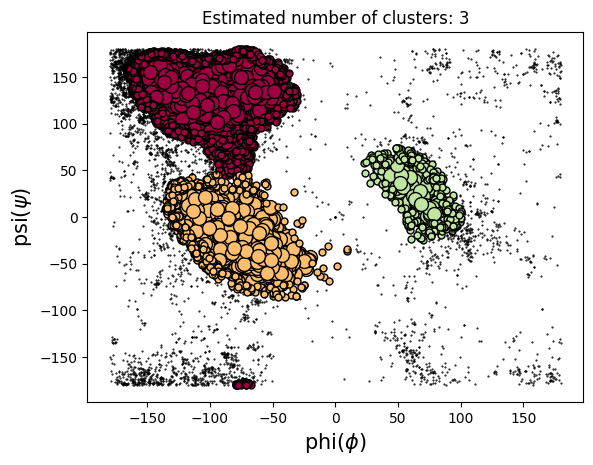

In [399]:
unique_labels = set(labels)
# print(unique_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        xy_noise = df_points[class_member_mask]
        plt.plot(xy_noise['phi'], xy_noise['psi'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=0.5)
        continue

    xy_core = df_points[class_member_mask & core_samples_mask]
    plt.plot(xy_core['phi'], xy_core['psi'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

    xy_border = df_points[class_member_mask & ~core_samples_mask]
    plt.plot(xy_border['phi'], xy_border['psi'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=5)


plt.xlabel('phi($\phi$)',fontsize=15)
plt.ylabel('psi($\psi$)',fontsize=15)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()